## Introduction
####  Identify the type of climate the exoplanet has based on the properties of the fruit. 

### Import the necessary packages.

In [ ]:
!pip install klib

In [5]:
import klib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
import re
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [6]:
train=pd.read_csv("/content/gdrive/MyDrive/odetocode_predicting_weather_using_alien_fruit_propertie/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/odetocode_predicting_weather_using_alien_fruit_propertie/test.csv")

#### The columns name contains hyphen(-).Let's replace it with an underscore(_). Also for a better visualization categorical levels are recorded by using the competition data dictionary.

In [7]:
def clean(df):

  df=df.rename(columns={col:re.sub("\-","_",col) for col in df.columns.values})

  
  edible_map={'e':'edible', 'p':'poisonous'}

  cap_shape_map={'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat',
                's':'sunken', 'p':'spherical', 'o':'others'}

  cap_clr_map={'n':'brown', 'b':'buff', 'g':'gray', 
              'r':'green', 'p':'pink', 'u':'purple',
              'e':'red', 'w':'white', 'y':'yellow',
              'l':'blue', 'o':'orange', 'k':'black'}

  dbd_map={'t':'bruises_or_bleeding','f':'no'}   

  gill_att_map={'a':'adnate', 'x':'adnexed', 'd':'decurrent', 'e':'free', 
                's':'sinuate', 'p':'pores', 'f':'none'} 

  gill_clr_map={**cap_clr_map,**dict(f='none')}     

  stem_clr_map=gill_clr_map

  has_ring_map={'t':'ring', 'f':'none'}

  ring_type_map=dict(c='cobwebby', e='evanescent', r='flaring',
                    g='grooved', l='large', p='pendant', 
                    s='sheathing', z='zone', y='scaly', 
                    m='movable', f='none')


  habitat_map=dict(g='grasses', l='leaves', m='meadows',
                  p='paths', h='heaths', u='urban', 
                  w='waste', d='woods')
  
  map_columns=[edible_map,cap_shape_map,cap_clr_map,dbd_map,gill_att_map,gill_clr_map,
               stem_clr_map,has_ring_map,ring_type_map,habitat_map]
  
  def cat_level_map(df):
    for i, (col,maps) in enumerate(zip(['edible_poisonous', 'cap_shape', 'cap_color',
                                        'does_bruise_or_bleed','gill_attachment', 
                                        'gill_color', 'stem_color', 'has_ring', 
                                        'ring_type','habitat'],map_columns)):
      df[col]=df[col].map(maps)
    return df  


  df= cat_level_map(df)

  return df           


In [8]:
class_map={'s':'spring', 'u':'summer', 'a':'autumn', 'w':'winter'}

In [9]:
train['season']=train['season'].map(class_map)

In [10]:
train=clean(train)

In [ ]:
test=clean(test)

#### The cap_diameter and stem_height in cm scale and stem_width in mm scale.So let's change stem_width scale to cm.

In [11]:
train['stem_width']=train['stem_width']/10

In [13]:
test['stem_width']=test['stem_width']/10

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible_poisonous      42748 non-null  object 
 1   cap_diameter          42748 non-null  float64
 2   cap_shape             42748 non-null  object 
 3   cap_color             42748 non-null  object 
 4   does_bruise_or_bleed  42748 non-null  object 
 5   gill_attachment       35808 non-null  object 
 6   gill_color            42748 non-null  object 
 7   stem_height           42748 non-null  float64
 8   stem_width            42748 non-null  float64
 9   stem_color            42748 non-null  object 
 10  has_ring              42748 non-null  object 
 11  ring_type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


#### The above information shows that there are 42748 data entries and 14 columns.

#### The target column is **Season**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible_poisonous      18321 non-null  object 
 1   cap_diameter          18321 non-null  float64
 2   cap_shape             18321 non-null  object 
 3   cap_color             18321 non-null  object 
 4   does_bruise_or_bleed  18321 non-null  object 
 5   gill_attachment       15377 non-null  object 
 6   gill_color            18321 non-null  object 
 7   stem_height           18321 non-null  float64
 8   stem_width            18321 non-null  float64
 9   stem_color            18321 non-null  object 
 10  has_ring              18321 non-null  object 
 11  ring_type             17569 non-null  object 
 12  habitat               18321 non-null  object 
 13  season                0 non-null      float64
dtypes: float64(4), object(10)
memory usage: 2.0+ MB


#### The above information shows that there are 18321 data entries and 13 columns.

#### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

edible_poisonous           0
cap_diameter               0
cap_shape                  0
cap_color                  0
does_bruise_or_bleed       0
gill_attachment         6940
gill_color                 0
stem_height                0
stem_width                 0
stem_color                 0
has_ring                   0
ring_type               1719
habitat                    0
season                     0
dtype: int64

#### The above information shows that the train dataset has more missing valuese in gill_attachment and ring_type columns.

In [ ]:
test.isnull().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2944
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                 752
habitat                     0
season                  18321
dtype: int64

#### The above information shows that the train dataset has more missing valuese in gill_attachment and ring_type columns.

#### Let's see the glimpse of train dataset

In [ ]:
train.head()

,edible_poisonous,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_attachment,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,poisonous,5.75,convex,brown,bruises_or_bleeding,sinuate,white,6.13,14.93,white,none,none,woods,autumn
1,poisonous,2.27,others,gray,no,none,none,0.00,0.00,none,none,none,woods,spring
2,poisonous,5.59,conical,yellow,bruises_or_bleeding,adnexed,pink,5.47,11.27,white,none,none,woods,autumn
3,poisonous,0.74,convex,pink,no,adnate,brown,4.33,0.98,black,none,none,woods,autumn
4,poisonous,9.60,convex,brown,no,adnate,white,10.84,28.52,white,none,none,woods,summer


### Let's explore and visualize each column of train dataset.First,let's see the target column(**season**) distribution.

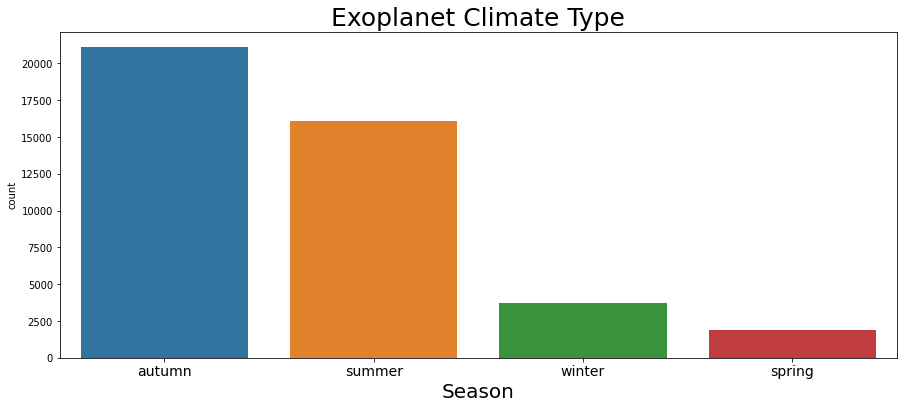

In [ ]:
plt.figure(figsize=(15,6))
_=sns.countplot(train['season'],order=train['season'].value_counts().index)
_=plt.title("Exoplanet Climate Type",fontsize=25)
_=plt.xlabel('Season',fontsize=20)
_=plt.xticks(fontsize=14)

In [ ]:
train['season'].value_counts()

autumn    21103
summer    16055
winter     3698
spring     1892
Name: season, dtype: int64

#### The above bar chart explains that there is a class imbalance between target labels.


### Let's see categorical columns distribution.

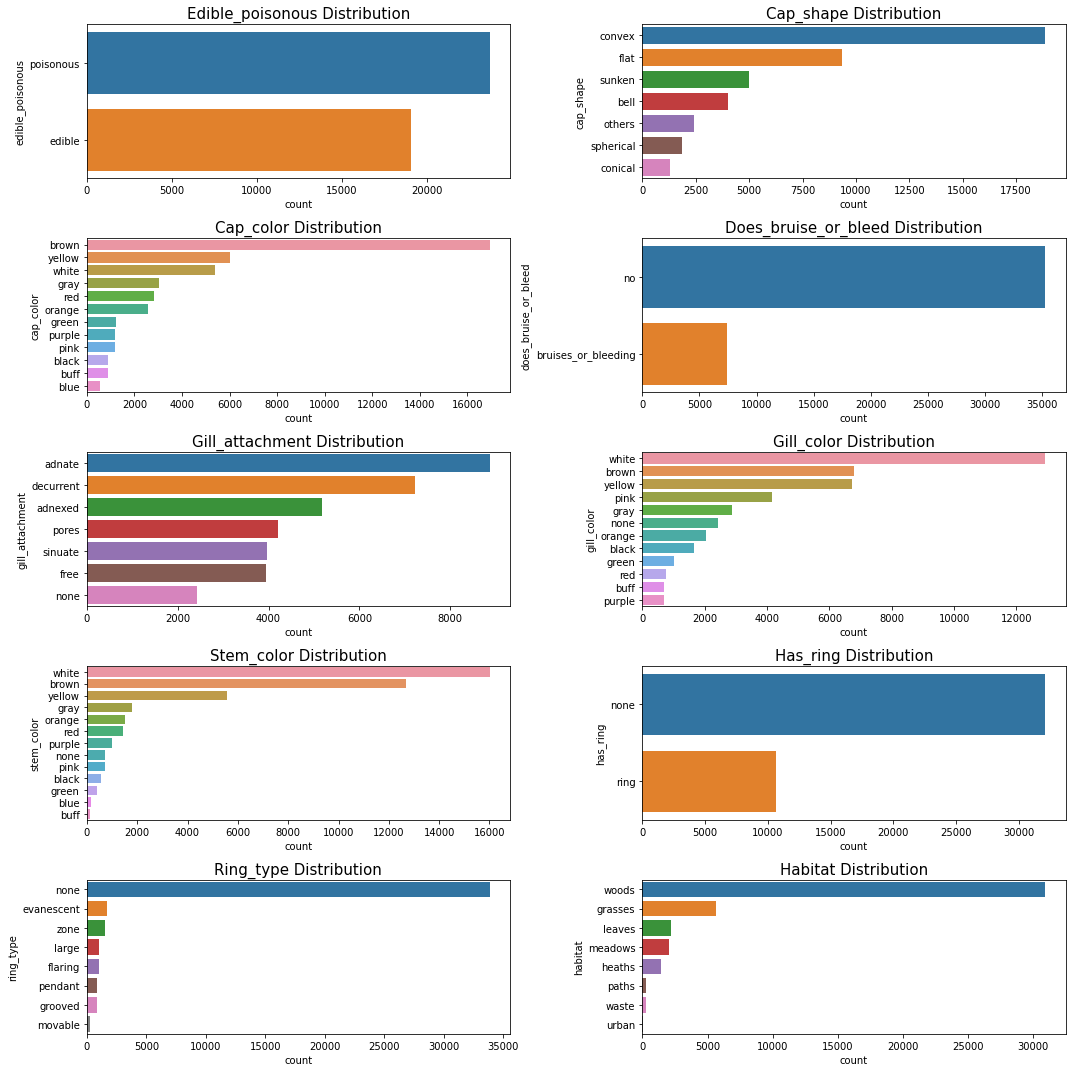

In [ ]:
fig=plt.subplots(figsize=(15, 15))
for i,col  in enumerate(['edible_poisonous', 'cap_shape', 'cap_color', 'does_bruise_or_bleed',
       'gill_attachment', 'gill_color', 'stem_color', 'has_ring', 'ring_type',
       'habitat']):    
       _=plt.subplot(5,2,i+1)
       _=sns.countplot(y=train[col],order=train[col].value_counts().index)
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.ylabel(col,fontsize=10)
       _=plt.yticks(fontsize=10)
       _=plt.tight_layout()  
plt.show()  

#### The above chart shows various categorical column levels and its counts.

### Let's see categorical columns distribution and how seasons are classified in each column.


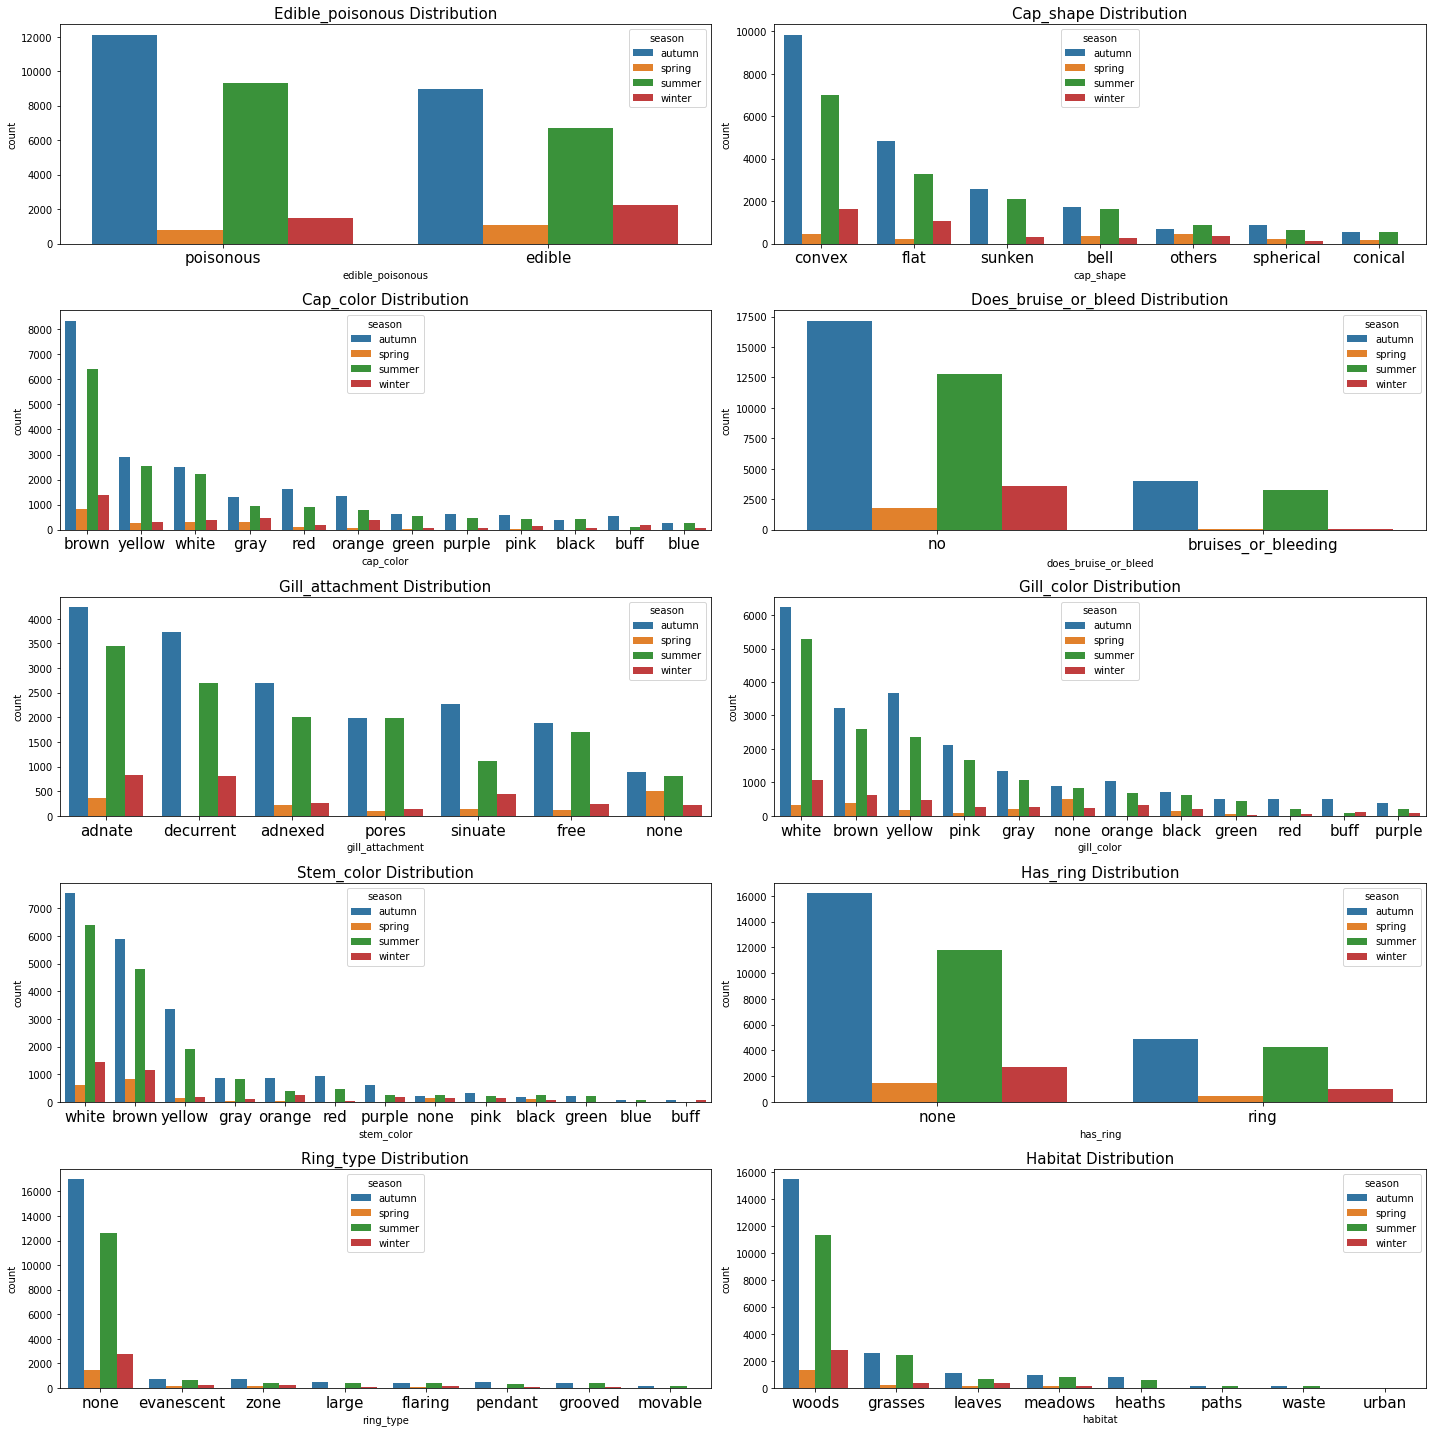

In [ ]:
fig=plt.subplots(figsize=(20, 20))
for i,col  in enumerate(['edible_poisonous', 'cap_shape', 'cap_color', 'does_bruise_or_bleed',
       'gill_attachment', 'gill_color', 'stem_color', 'has_ring', 'ring_type',
       'habitat']):    
       _=plt.subplot(5,2,i+1)
       _=sns.countplot(x=train[col],order=train[col].value_counts().index,hue=train['season'])
       _=plt.title(col.capitalize()+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()


#### The above chart shows how exoplanet seasons are classified under each fruit properties column.

### Let's see numerical fruit properties columns distribution.

In [ ]:
train.select_dtypes(exclude='object').columns

Index(['cap_diameter', 'stem_height', 'stem_width'], dtype='object')

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


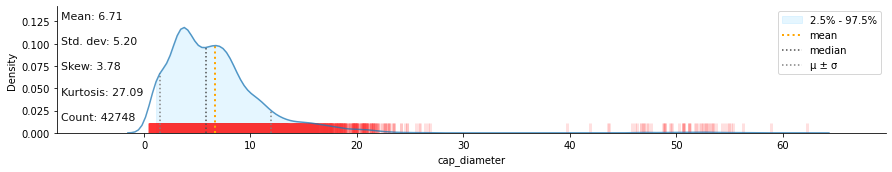

In [ ]:
klib.dist_plot(train['cap_diameter']);

#### The above distribution shows that the mean is greater than the median so the cap diameter column is positively skewed.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


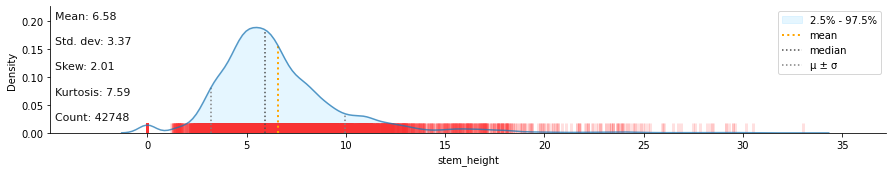

In [ ]:
klib.dist_plot(train['stem_height']);

#### The above distribution shows that the mean is greater than the median so the stem height column is positively skewed.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


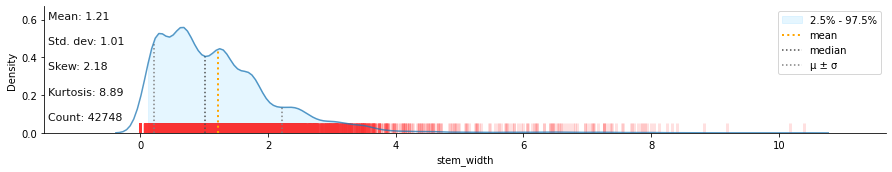

In [ ]:
klib.dist_plot(train['stem_width']);


#### The above distribution shows that the mean is greater than the median so the stem width column is positively skewed.

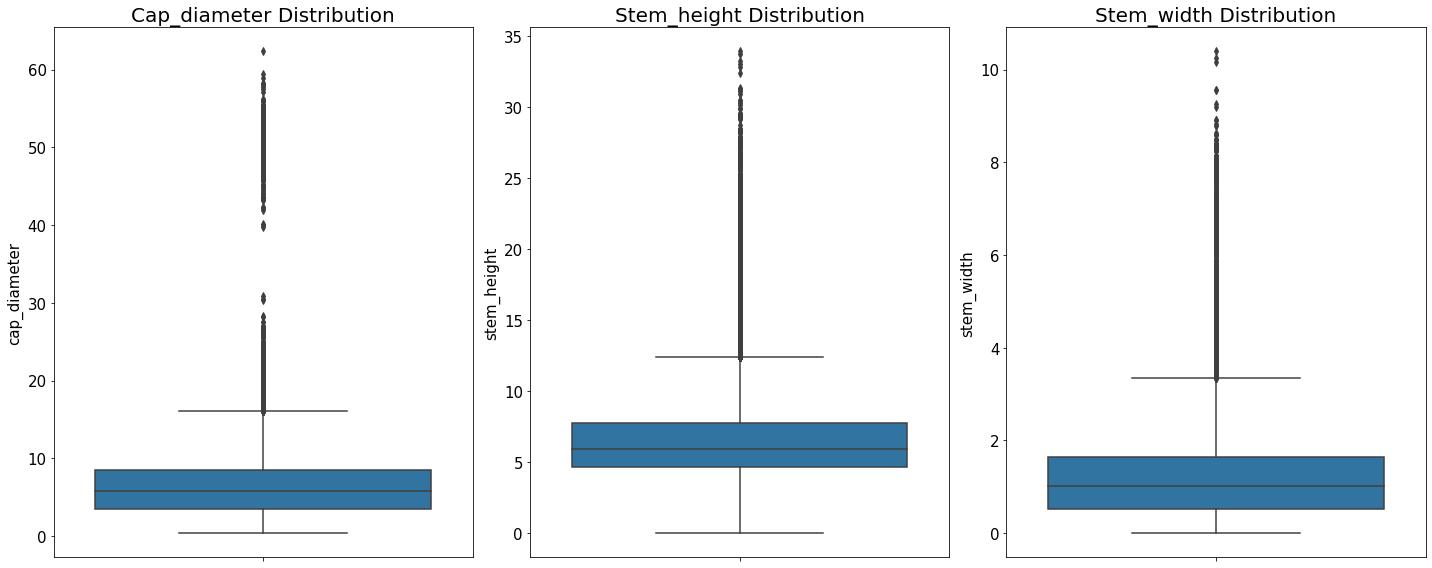

In [ ]:
fig=plt.subplots(figsize=(20, 8))
for i,col  in enumerate(train.select_dtypes(exclude='object').columns):    
       plt.subplot(1,3,i+1)
       sns.boxplot(y=train[col])
       plt.title(col.capitalize()+' Distribution',fontsize=20)
       plt.ylabel(col,fontsize=15)
       plt.yticks(fontsize=15)
       plt.tight_layout()  
plt.show()


In [ ]:
for col  in train.select_dtypes(exclude='object').columns: 
  print("="*100)
  print(f"{col} summary")
  print(f"{train[col].describe()}")
  print("="*100)

cap_diameter summary
count    42748.000000
mean         6.712018
std          5.203768
min          0.380000
25%          3.480000
50%          5.840000
75%          8.540000
max         62.340000
Name: cap_diameter, dtype: float64
stem_height summary
count    42748.000000
mean         6.580449
std          3.368385
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem_height, dtype: float64
stem_width summary
count    42748.000000
mean         1.213396
std          1.005893
min          0.000000
25%          0.519000
50%          1.014000
75%          1.653000
max         10.391000
Name: stem_width, dtype: float64


#### The above boxplot shows that there are outliers above the third quartile in all numerical columns.

### Let's see the pairwise relationship between numerical variables and see how exoplanet seasons are distributed.

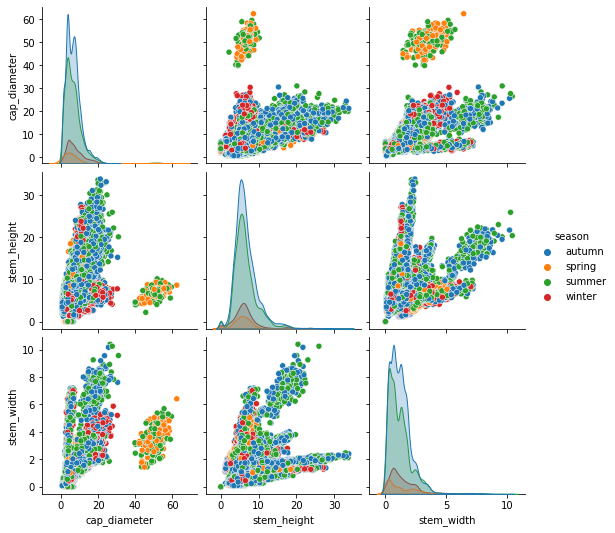

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','season']],
             hue='season');

In [ ]:
train[train['cap_diameter']>=31]['season'].unique()

array(['summer', 'spring'], dtype=object)

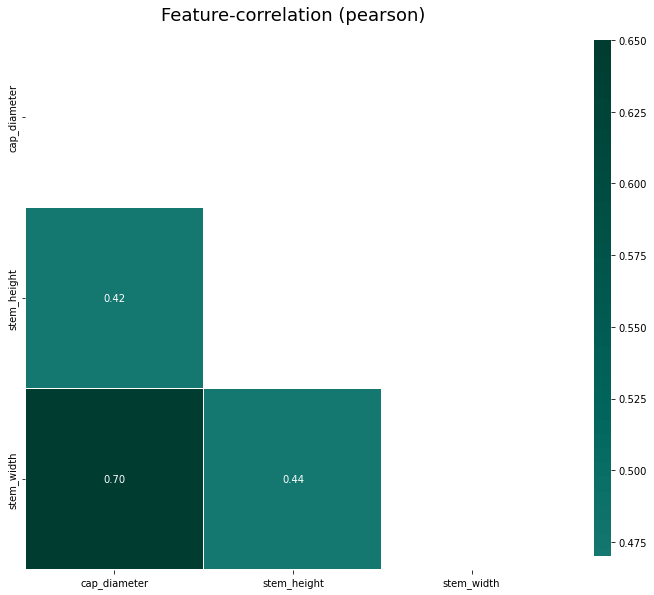

In [ ]:
klib.corr_plot(train);

#### The above charts show that there is a high positive correlation between the cap_diameter and stem_width.

#### If the fruit's cap diameter is greater than or equal to 31 means then it would be mostly summer and  spring.

### Let's see the pairwise relationship between numerical variables and see whether the fruit is  edible or not.

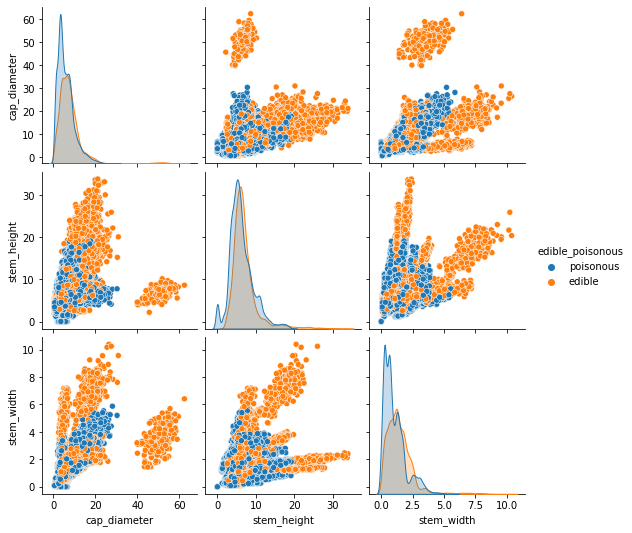

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','edible_poisonous']],
             hue='edible_poisonous');

#### If the fruit cap diameter is greater than or equal to 31 means then it would be mostly an edible fruit.

### Let's see the pairwise relationship between numerical variables and see how fruit shape is changed.

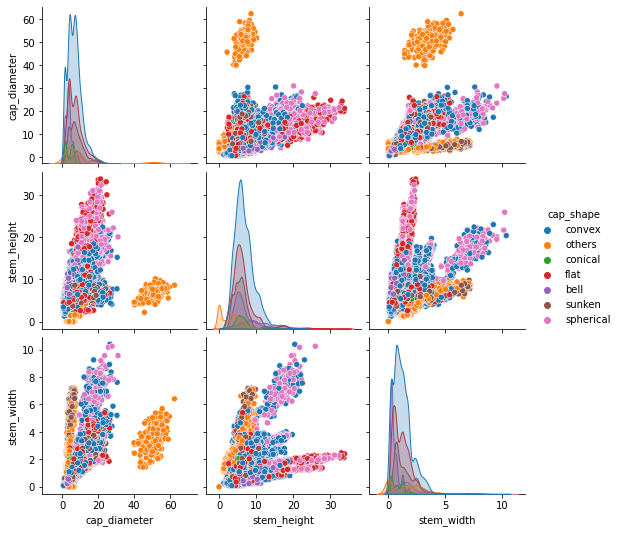

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','cap_shape']],
             hue='cap_shape');

#### If the fruit cap diameter is greater than or equal to 31 means then the fruit shape comes under other types.

### Let's see the pairwise relationship between numerical variables and see whether the fruit does have any damages.

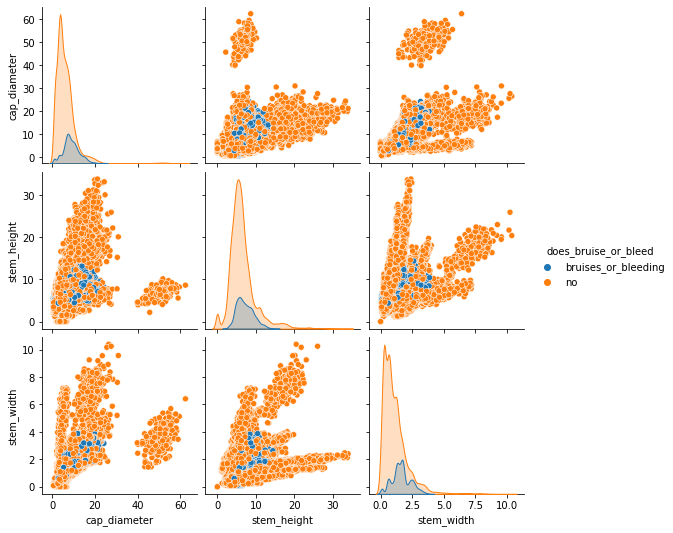

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','does_bruise_or_bleed']],
             hue='does_bruise_or_bleed');

#### If the fruit cap diameter is greater than or equal to 31 means then the fruit doesn't have any bruises.

### Let's see the pairwise relationship between numerical variables and see if there are any gills under the cap and its type.

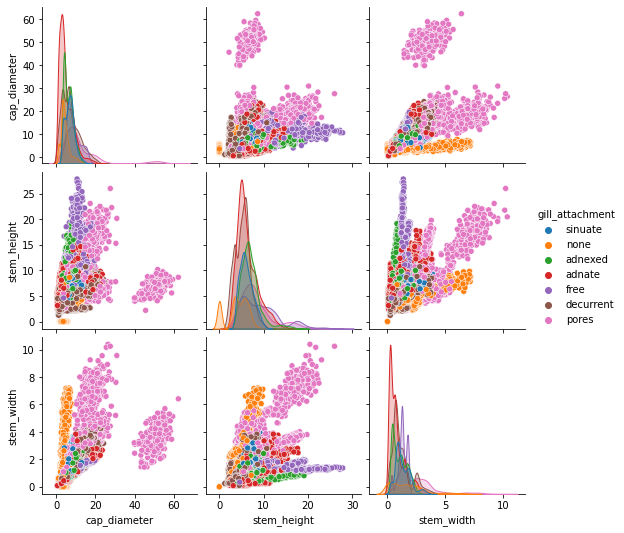

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','gill_attachment']],
             hue='gill_attachment');

#### If the fruit cap diameter is greater than or equal to 31 means then the fruit has pores type of gill attachment under the cap.

### Let's see the pairwise relationship between numerical variables and see if there are any rings in fruit.

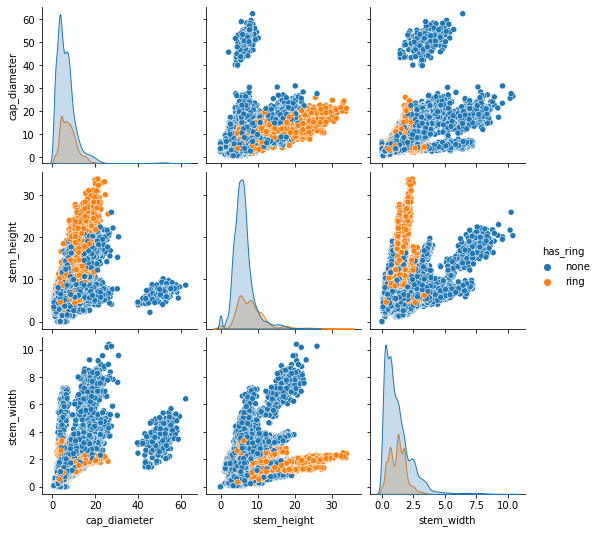

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','has_ring']],
             hue='has_ring');

#### If the fruit cap diameter is greater than or equal to 31 means then the fruit doesn't have any ring.

### Let's see the pairwise relationship between numerical variables and see the fruits that do have rings and their types.

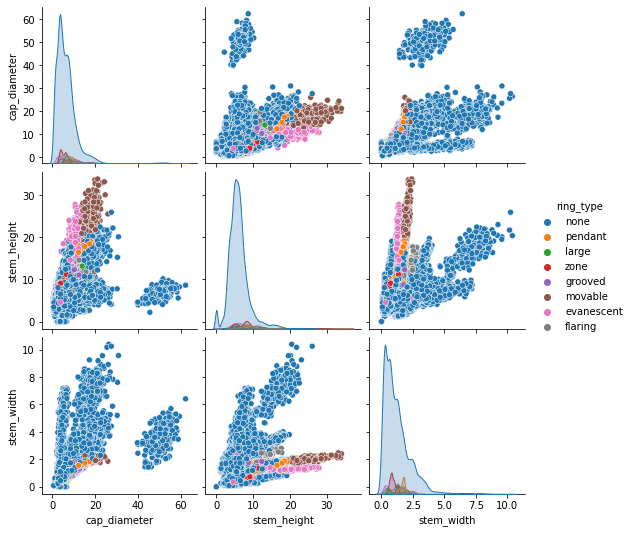

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','ring_type']],
             hue='ring_type');

#### If the fruit cap diameter is greater than or equal to 31 means the fruit has a ring but the type of ring is unidentified(none).

### Let's see the pairwise relationship between numerical variables and see the environment of the fruit plant.

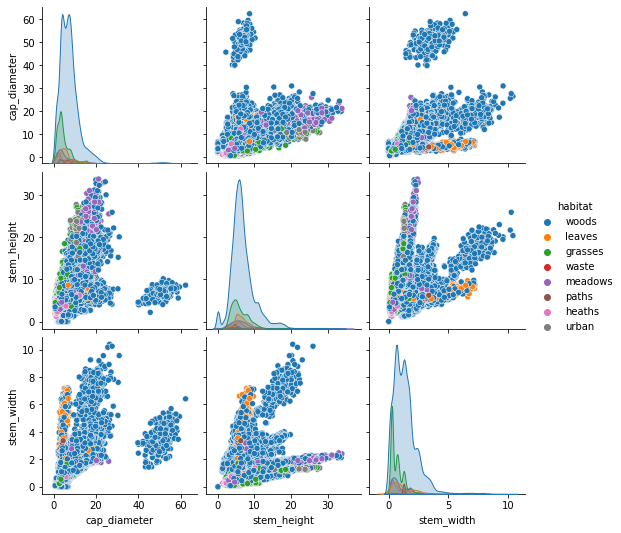

In [ ]:
sns.pairplot(train.loc[:,['cap_diameter', 'stem_height', 'stem_width','cap_color','habitat']],
             hue='habitat');

#### If the fruit cap diameter is greater than or equal to 31 means then the fruit plant lives in a wood environment.

### Let's see a quick feature importance using extratreesclassifier algorithm.

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [15]:
lbl=LabelEncoder()

In [16]:
for col in train.select_dtypes(include='object').columns:
  train[col]=lbl.fit_transform(train[[col]])

In [17]:
X=train.drop(columns='season')
y=train['season']

In [18]:
clf = ExtraTreesClassifier(n_estimators=500)

In [19]:
clf.fit(X, y)

ExtraTreesClassifier(n_estimators=500)

In [ ]:
clf.feature_names_in_

array(['edible_poisonous', 'cap_diameter', 'cap_shape', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_color',
       'stem_height', 'stem_width', 'stem_color', 'has_ring', 'ring_type',
       'habitat'], dtype=object)

In [45]:
feat_imp=pd.DataFrame({'Features':clf.feature_names_in_,'value':clf.feature_importances_})

In [49]:
feat_imp.sort_values('value',ascending=False,inplace=True)

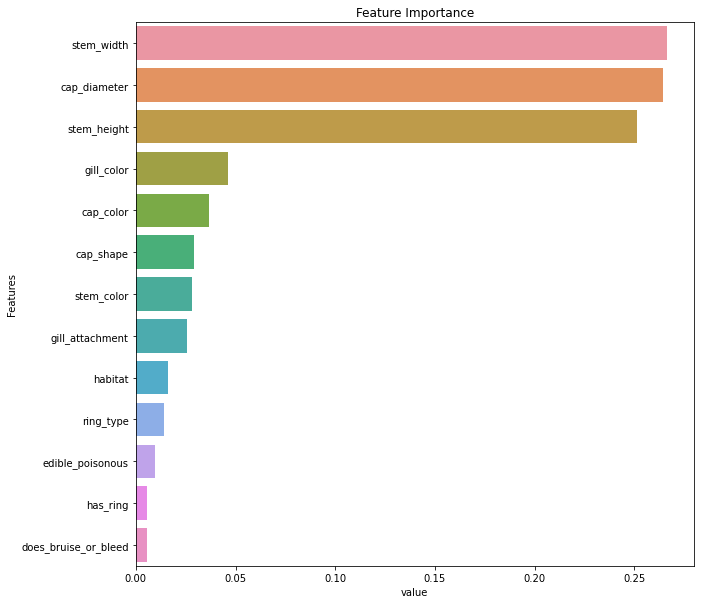

In [53]:
sns.barplot(x=feat_imp['value'],
    y=feat_imp['Features']);
plt.title("Feature Importance");    

#### The above plot explains that the numerical properties column of fruit has an important role in predicting the season of the exoplanet.